
 Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.



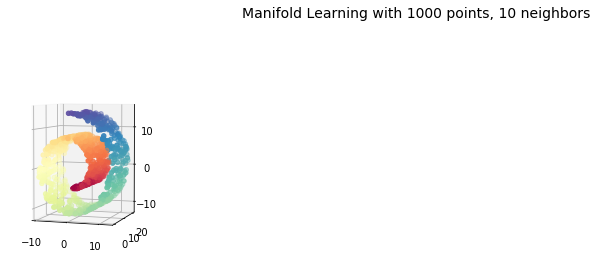

In [1]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%load_ext Cython

from sklearn import manifold, datasets
from sklearn.manifold.forests import ManifoldForest

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 


Manifold forests & t-SNE: 6e+02 sec


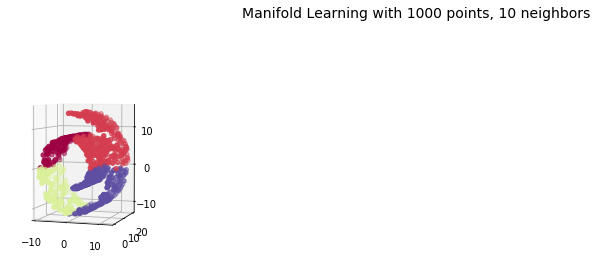

In [12]:
plt.figure()
t0 = time()
mf = ManifoldForest(n_estimators=1000, max_depth=4, n_jobs=-1)
W = mf.fit_transform(X)
tsne = manifold.SpectralEmbedding(n_components=1, affinity='precomputed', random_state=0)
Y = tsne.fit_transform(W)
t1 = time()
print("Manifold forests & t-SNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 

In [13]:
print(W)

[[ 1.     0.186  1.    ...,  0.013  0.013  0.186]
 [ 0.186  1.     0.186 ...,  0.196  0.196  1.   ]
 [ 1.     0.186  1.    ...,  0.013  0.013  0.186]
 ..., 
 [ 0.013  0.196  0.013 ...,  1.     1.     0.196]
 [ 0.013  0.196  0.013 ...,  1.     1.     0.196]
 [ 0.186  1.     0.186 ...,  0.196  0.196  1.   ]]


In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

a = DecisionTreeClassifier(splitter="gaussian")

In [5]:
a.fit(X, np.random.randint(5, size=X.shape[0]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='gaussian')

In [6]:
clusters

NameError: name 'clusters' is not defined

In [ ]:
np.unique(clusters)

In [ ]:
%load_ext Cython

In [ ]:
%%cython

cimport numpy as np
import numpy as np
from cpython cimport array
np.import_array()

cdef double* test(double* X):
    cdef np.npy_intp[2] dims = [2, 3]
    cdef np.ndarray a = np.PyArray_SimpleNewFromData(2, dims, np.NPY_DOUBLE, X)
#     a = np.reshape(a, (2, 3))
    print(a[1][2])
    return &X[1]

cdef double det():
    cdef np.ndarray[np.double_t, ndim=2, mode="c"] a = np.array([[0,1,2], [3,4,5]], dtype=np.float)
    cdef double* b
    b = test(&a[0,0])
    return b[0]

print(det())